In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
comments = pd.read_csv('C:/Users/KIIT/Desktop/Minor_Project/Integration & Testing/Dataset/CommentDataset.csv')
comments.head()

,Unnamed: 0,channel_id,video_id,like_count,comment
0,0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,these are the moments that happen in my dreams...
1,1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,8:00 Western vibes on a cold February in the J...
2,2,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,9:50 THE SHEER TERROR IN HIS VOICE IS SO FUNNY...
3,3,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,PewDiePie x Magnus Mitbø climb collab when?
4,4,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,This is the most wholesome video i've seen in ...


In [3]:
comments.shape

(2683, 5)

In [4]:
comments.isnull().sum()

Unnamed: 0    0
channel_id    0
video_id      0
like_count    0
comment       1
dtype: int64

In [5]:
comments.dropna(inplace=True)

In [6]:
comments.isnull().sum()

Unnamed: 0    0
channel_id    0
video_id      0
like_count    0
comment       0
dtype: int64

In [7]:
comments.nunique()

Unnamed: 0    2682
channel_id       1
video_id         1
like_count      82
comment       2638
dtype: int64

In [8]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2682 entries, 0 to 2682
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2682 non-null   int64 
 1   channel_id  2682 non-null   object
 2   video_id    2682 non-null   object
 3   like_count  2682 non-null   int64 
 4   comment     2682 non-null   object
dtypes: int64(2), object(3)
memory usage: 125.7+ KB


In [9]:
comments = comments.reset_index().drop('index',axis=1)
comments.like_count = comments.like_count.astype(int)

## Data Preprocessing

In [10]:
# Removing Punctuations, Numbers and Special Characters.
comments['comment'] = comments['comment'].str.replace("[^a-zA-Z#]", " ")

In [11]:
# Removing Short Words.
comments['comment'] = comments['comment'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
# Changing the text to lower case.
comments['comment'] = comments['comment'].apply(lambda x:x.lower())

In [13]:
# Tokenization
tokenized_comment = comments['comment'].apply(lambda x: x.split())
tokenized_comment.head()

0    [these, moments, that, happen, dreams., drivin...
1    [8:00, western, vibes, cold, february, japanes...
2       [9:50, sheer, terror, voice, funny, lmaoooooo]
3     [pewdiepie, magnus, mitbø, climb, collab, when?]
4    [this, most, wholesome, video, i've, seen, ver...
Name: comment, dtype: object

In [14]:
# Lemmatization
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
tokenized_comment.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_comment.head()

0    [these, moments, that, happen, dreams., drivin...
1    [8:00, western, vibes, cold, february, japanes...
2       [9:50, sheer, terror, voice, funny, lmaoooooo]
3     [pewdiepie, magnus, mitbø, climb, collab, when?]
4    [this, most, wholesome, video, i've, seen, ver...
Name: comment, dtype: object

In [16]:
for i in range(len(tokenized_comment)):
    tokenized_comment[i] = ' '.join(tokenized_comment[i])

In [17]:
comments['comment'] = tokenized_comment

## Sentiment analysis

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [20]:
# Setting The Sentiment Scores
comments['Sentiment Scores'] = comments['comment'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [21]:
comments.head()

,Unnamed: 0,channel_id,video_id,like_count,comment,Sentiment Scores
0,0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,these moments that happen dreams. driving free...,0.6808
1,1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,8:00 western vibes cold february japanese coun...,0.0000
2,2,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,9:50 sheer terror voice funny lmaoooooo,-0.1280
3,3,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,pewdiepie magnus mitbø climb collab when?,0.0000
4,4,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,this most wholesome video i've seen very long ...,0.4144


In [22]:
# Classifying the Sentiment scores as Positive, Negative and Neutral
comments['Sentiment'] = comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [23]:
comments.head()

,Unnamed: 0,channel_id,video_id,like_count,comment,Sentiment Scores,Sentiment
0,0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,these moments that happen dreams. driving free...,0.6808,Positive
1,1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,8:00 western vibes cold february japanese coun...,0.0000,Neutral
2,2,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,9:50 sheer terror voice funny lmaoooooo,-0.1280,Negative
3,3,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,pewdiepie magnus mitbø climb collab when?,0.0000,Neutral
4,4,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,0,this most wholesome video i've seen very long ...,0.4144,Positive


In [24]:
comments.Sentiment.value_counts()

Sentiment
Positive    1562
Neutral      919
Negative     201
Name: count, dtype: int64

In [25]:
# Now we will calculate the percentage of comments which are positive in all the videos.

a = comments[(comments.Sentiment == 'Positive')].count()[0]
b = comments['Sentiment'].value_counts().sum()
Percentage = (a/b)*100

print("Positive Percentge = "+str(Percentage))

Positive Percentge = 58.24011931394482


# *Performance Analysis*

## Contstructing a wordcloud
     - to visualize the most frequently occurring words in the comment section. This can provide insights into the topics or themes discussed by viewers.

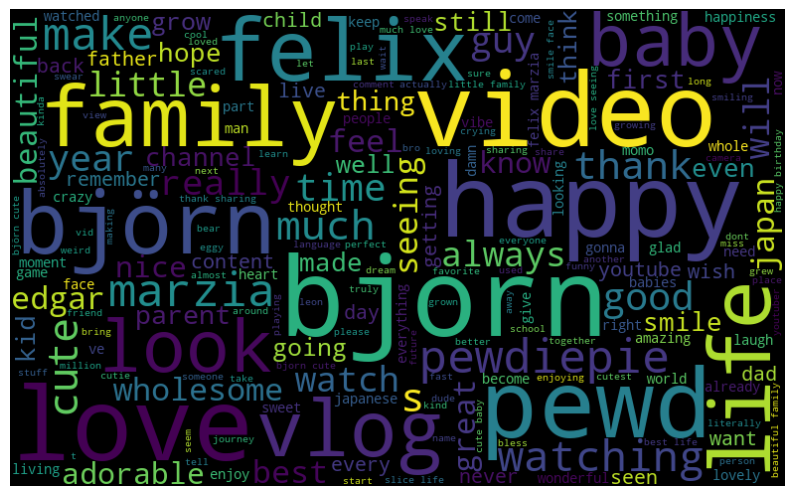

In [26]:
all_words = ' '.join([text for text in comments['comment']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=780, height=480, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Constructing a Wordcloud of Positive Comments

In [27]:
all_words_posi = ' '.join([text for text in comments['comment'][comments.Sentiment == 'Positive']])

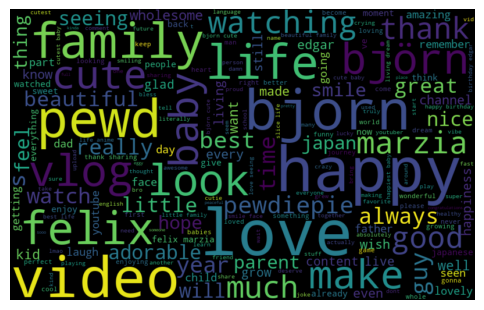

In [28]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

## Constructing a Wordcloud of Negative Comments

In [29]:
all_words_nega = ' '.join([text for text in comments['comment'][comments.Sentiment == 'Negative']])

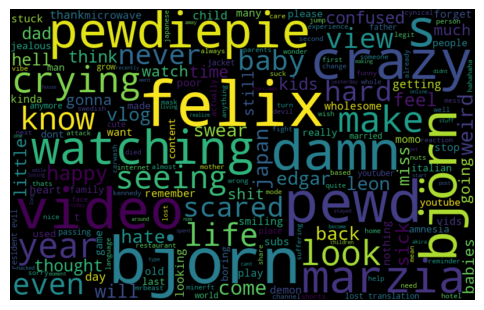

In [30]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

## Contsructing a Wordcloud of Neutral Comments.

In [31]:
all_words_neu = ' '.join([text for text in comments['comment'][comments.Sentiment == 'Neutral']])

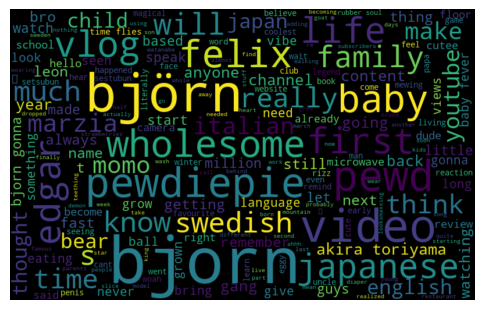

In [32]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()

## Box Plot of Sentiment Scores

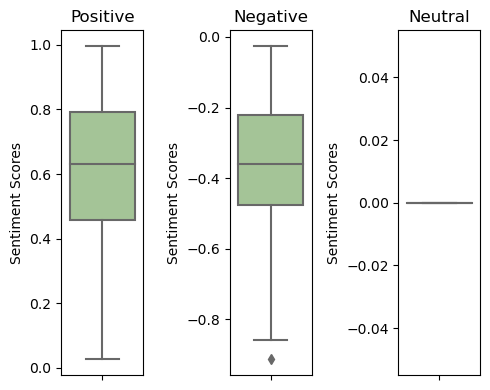

In [33]:
sent = ['Positive','Negative','Neutral']
fig, axs = plt.subplots(1, 3, figsize=(5, 4))

for i, sentiment in enumerate(sent):
    ax = axs[i]
    sns.boxplot(y=comments.loc[comments['Sentiment'] == sentiment, 'Sentiment Scores'], color='#A1CB90', orient='v', ax=ax)
    ax.set_title(sentiment)
    ax.set_ylabel('Sentiment Scores')

plt.tight_layout()
plt.show()

## Sentiment distribution chart 

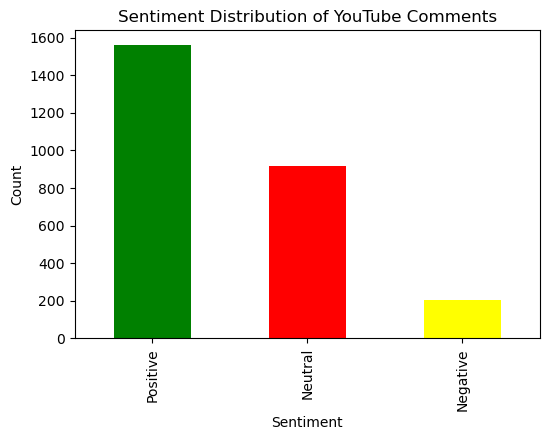

In [34]:
 sentiment_df = pd.DataFrame(comments.Sentiment.value_counts())

plt.figure(figsize=(6, 4))
sentiment_df['count'].plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('Sentiment Distribution of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()